# Data Eksploration

Kode di bawah adalah prores eksplorasi data IDM

In [1]:
import os
from PIL import Image
import pandas as pd
import shutil

In [2]:
import geopandas as gpd

#### Preprocessing

In [6]:
idm = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/idm_jabar.csv")

In [7]:
idm

,desa,nama,id_kecamatan,nama_kecamatan,id_kabupaten,nama_kabupaten,iks,ike,ikl,avg_idm,status
0,3201022001,WANAHERANG,320102,GUNUNG PUTRI,3201,KABUPATEN BOGOR,0.9486,0.8500,0.3333,0.7106,MAJU
1,3201022007,CICADAS,320102,GUNUNG PUTRI,3201,KABUPATEN BOGOR,0.9371,0.8833,0.6000,0.8068,MAJU
2,3201022008,CIKEAS UDIK,320102,GUNUNG PUTRI,3201,KABUPATEN BOGOR,0.8800,0.6833,0.6000,0.7211,MAJU
3,3201022010,KARANGGAN,320102,GUNUNG PUTRI,3201,KABUPATEN BOGOR,0.8114,0.8167,0.6000,0.7427,MAJU
4,3201032008,KARANG ASEM TIMUR,320103,CITEUREUP,3201,KABUPATEN BOGOR,0.8286,0.7000,0.6000,0.7095,MAJU
...,...,...,...,...,...,...,...,...,...,...,...
5307,3215302005,KOSAMBIBATU,321530,CILEBAR,3215,KABUPATEN KARAWANG,0.6343,0.4500,0.6000,0.5614,TERTINGGAL
5308,3215302006,PUSAKAJAYA UTARA,321530,CILEBAR,3215,KABUPATEN KARAWANG,0.7086,0.5500,0.4667,0.5751,TERTINGGAL
5309,3215302007,SUKARATU,321530,CILEBAR,3215,KABUPATEN KARAWANG,0.6571,0.5000,0.6000,0.5857,TERTINGGAL
5310,3215302008,CIPTAMARGI,321530,CILEBAR,3215,KABUPATEN KARAWANG,0.6057,0.5667,0.6000,0.5908,TERTINGGAL


In [4]:
convrt_code = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/diskominfo-od_kode_wilayah_dan_nama_wilayah_desa_kelurahan_data.csv")

In [5]:
convrt_code.kemendagri_kelurahan_kode = convrt_code.kemendagri_kelurahan_kode.str.replace(".","")

C:\Users\jwst2\AppData\Local\Temp\ipykernel_32048\691296655.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  convrt_code.kemendagri_kelurahan_kode = convrt_code.kemendagri_kelurahan_kode.str.replace(".","")


In [6]:
convrt_code.kemendagri_kelurahan_kode

0       3201011001
1       3201011002
2       3201011003
3       3201011004
4       3201011005
           ...    
5952    3279042002
5953    3279042003
5954    3279041004
5955    3279041005
5956    3279042006
Name: kemendagri_kelurahan_kode, Length: 5957, dtype: object

In [7]:
convrt_code.kemendagri_kelurahan_kode.nunique()

5957

In [8]:
idm["desa"] = idm["desa"].apply(str)
convrt_code["kemendagri_kelurahan_kode"] = convrt_code["kemendagri_kelurahan_kode"].apply(str)

In [124]:
idmnew = convrt_code.set_index('kemendagri_kelurahan_kode').join(idm.set_index('desa'),how = "left")

In [128]:
idmnew.to_csv("C:/Users/jwst2/Python/tesis/dataset/newdata.csv")

In [129]:
idm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5312 entries, 0 to 5311
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   desa            5312 non-null   object 
 1   nama            5312 non-null   object 
 2   id_kecamatan    5312 non-null   int64  
 3   nama_kecamatan  5312 non-null   object 
 4   id_kabupaten    5312 non-null   int64  
 5   nama_kabupaten  5312 non-null   object 
 6   iks             5312 non-null   float64
 7   ike             5312 non-null   float64
 8   ikl             5312 non-null   float64
 9   avg_idm         5312 non-null   float64
 10  status          5312 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 456.6+ KB


In [130]:
idm["desa"] = idm["desa"].apply(str)
convrt_code["kemendagri_kelurahan_kode"] = convrt_code["kemendagri_kelurahan_kode"].apply(str)

In [ ]:
idmnew = convrt_code.set_index('kemendagri_kelurahan_kode').join(idm.set_index('desa'),how = "left")

#### View BPS

In [3]:
jabar = gpd.read_file("C:/Data/kuliah/Tesis/GGE tesis/Polygon/DESA_32/desa_32.shp")


In [4]:
jabar["iddesa"]  = jabar.kdprov +jabar.kdkab+jabar.kdkec+jabar.kddesa
jabar["iddesa"]  = jabar["iddesa"].apply(str)

In [5]:
idmnew = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/newdata_edit.csv")
idmnew["bps_kelurahan_kode"] = idmnew["bps_kelurahan_kode"].apply(str)
idmnew["bps_kelurahan_kode"] = idmnew.bps_kelurahan_kode.str[0:10]

In [6]:
idmnew = idmnew[idmnew.status.notnull()]

In [7]:
idmnew.bps_kelurahan_kode[idmnew.duplicated(subset=['bps_kelurahan_kode'])]

Series([], Name: bps_kelurahan_kode, dtype: object)

In [8]:
idmnew.set_index("bps_kelurahan_kode",inplace = True)

In [9]:
idmnew.groupby("bps_kelurahan_kode").count()[idmnew.groupby("bps_kelurahan_kode").count().id >1]

,kemendagri_kelurahan_kode,status,bps_kelurahan_nama,kemendagri_kelurahan_nama,id,kemendagri_provinsi_kode,kemendagri_kota_kode,kemendagri_kecamatan_kode,kemendagri_provinsi_nama,kemendagri_kota_nama,...,status_adm,nama,id_kecamatan,nama_kecamatan,id_kabupaten,nama_kabupaten,iks,ike,ikl,avg_idm
bps_kelurahan_kode,,,,,,,,,,,,,,,,,,,,,


In [10]:
idmnew.groupby("status").count()

,kemendagri_kelurahan_kode,bps_kelurahan_nama,kemendagri_kelurahan_nama,id,kemendagri_provinsi_kode,kemendagri_kota_kode,kemendagri_kecamatan_kode,kemendagri_provinsi_nama,kemendagri_kota_nama,kemendagri_kecamatan_nama,...,status_adm,nama,id_kecamatan,nama_kecamatan,id_kabupaten,nama_kabupaten,iks,ike,ikl,avg_idm
status,,,,,,,,,,,,,,,,,,,,,
BERKEMBANG,3290,3223,3290,3290,3290,3290,3290,3290,3290,3290,...,0,3290,3290,3290,3290,3290,3290,3290,3290,3290
MAJU,1631,1584,1631,1631,1631,1631,1631,1631,1631,1631,...,0,1631,1631,1631,1631,1631,1631,1631,1631,1631
MANDIRI,270,267,270,270,270,270,270,270,270,270,...,0,270,270,270,270,270,270,270,270,270
TERTINGGAL,121,119,121,121,121,121,121,121,121,121,...,0,121,121,121,121,121,121,121,121,121


In [11]:
jabar = jabar.set_index('iddesa').join(idmnew, how='left')

In [12]:
jabar.groupby("status").count()

,kdprov,kdkab,kdkec,kddesa,nmprov,nmkab,nmkec,nmdesa,sumber,periode,...,status_adm,nama,id_kecamatan,nama_kecamatan,id_kabupaten,nama_kabupaten,iks,ike,ikl,avg_idm
status,,,,,,,,,,,,,,,,,,,,,
BERKEMBANG,3290,3290,3290,3290,3290,3290,3290,3290,3290,3290,...,0,3290,3290,3290,3290,3290,3290,3290,3290,3290
MAJU,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,...,0,1630,1630,1630,1630,1630,1630,1630,1630,1630
MANDIRI,270,270,270,270,270,270,270,270,270,270,...,0,270,270,270,270,270,270,270,270,270
TERTINGGAL,121,121,121,121,121,121,121,121,121,121,...,0,121,121,121,121,121,121,121,121,121


In [13]:
list(set(idmnew.index[idmnew.status == "MAJU"])-set(jabar.index[jabar.status == "MAJU"]))

['3209100005']

In [14]:
idmnew.index[idmnew.status == "MAJU"].shape

(1631,)

In [15]:
jabar.index[jabar.status == "MAJU"].shape

(1630,)

Tobler (1970) mengemukakan hukum pertama tentang demografi bahwa setiap hal saling berhubungan, tetapi hal yang dekat memiliki hubungan erat. Berdasarkan teori tersebut beberapa penelitian klasifikasi deep learning citra remote sensing melibatkan neighboring effect menunjukkan bahwa model bisa jadi lebih baik performanya (Huang et al 2021) meskipun teradapat kasus di mana efek tersebut tidak memperbaiki model (Xing et al 2020). 
Gambar 7 dan Gambar 8 memperlihatkan variabel urban/rural dan IDM memiliki pola yang bersesuaian dengan hukum Tobler sehingga perlu dipertimbangkan neighboring effect untuk meningkatkan peforma model klasifikasi.


<AxesSubplot:>

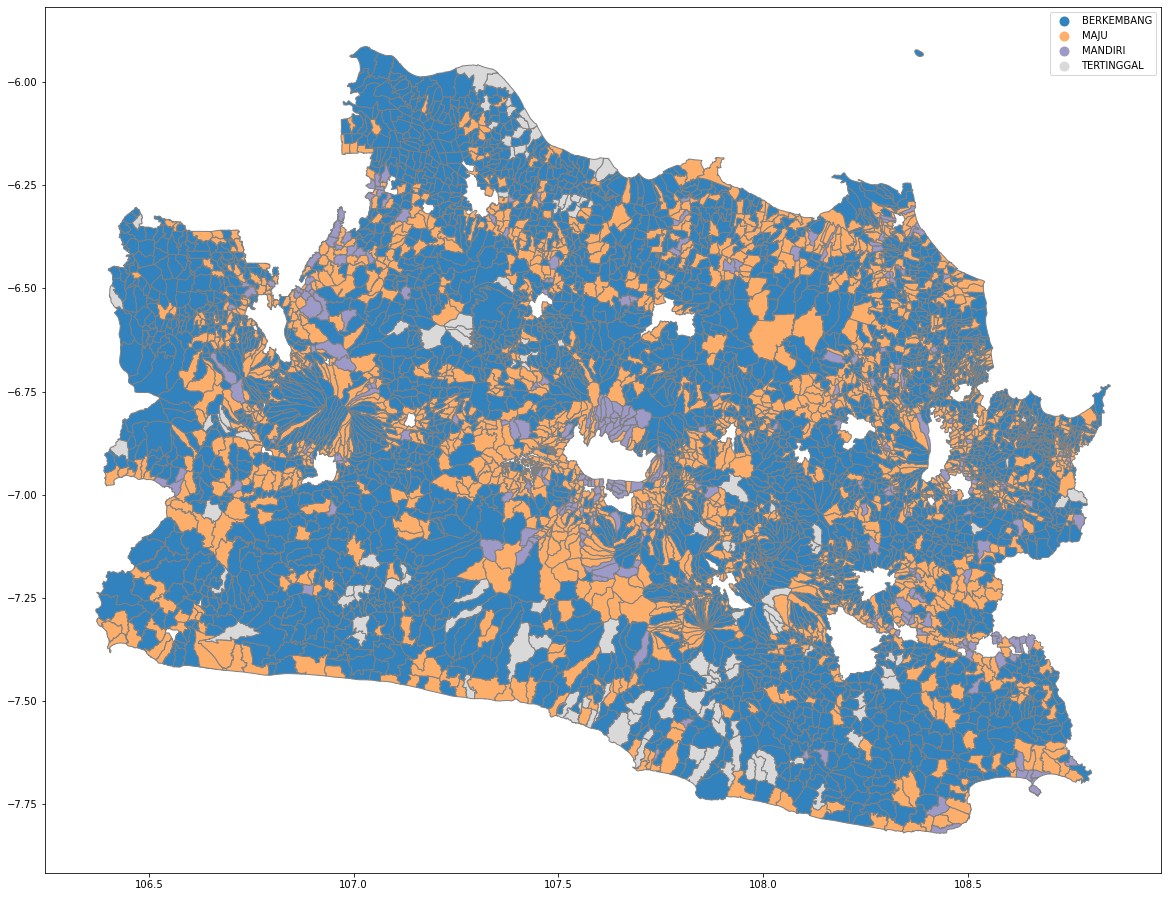

In [16]:
jabar.plot(column='status', figsize=(20, 20), legend=True, edgecolor='grey',cmap = "tab20c" )

In [17]:
jabar.head()

,kdprov,kdkab,kdkec,kddesa,nmprov,nmkab,nmkec,nmdesa,sumber,periode,...,status_adm,nama,id_kecamatan,nama_kecamatan,id_kabupaten,nama_kabupaten,iks,ike,ikl,avg_idm
iddesa,,,,,,,,,,,,,,,,,,,,,
3201010001,32,01,010,001,JAWA BARAT,BOGOR,NANGGUNG,MALASARI,BPS,2019,...,NaN,MALASARI,320121.0,NANGGUNG,3201.0,KABUPATEN BOGOR,0.7314,0.4833,0.6000,0.6049
3201010002,32,01,010,002,JAWA BARAT,BOGOR,NANGGUNG,BANTAR KARET,BPS,2019,...,NaN,BANTARKARET,320121.0,NANGGUNG,3201.0,KABUPATEN BOGOR,0.7771,0.6500,0.6000,0.6757
3201010003,32,01,010,003,JAWA BARAT,BOGOR,NANGGUNG,CISARUA,BPS,2019,...,NaN,CISARUA,320121.0,NANGGUNG,3201.0,KABUPATEN BOGOR,0.7200,0.5500,0.6000,0.6233
3201010004,32,01,010,004,JAWA BARAT,BOGOR,NANGGUNG,CURUG BITUNG,BPS,2019,...,NaN,CURUGBITUNG,320121.0,NANGGUNG,3201.0,KABUPATEN BOGOR,0.7657,0.6333,0.5333,0.6441
3201010005,32,01,010,005,JAWA BARAT,BOGOR,NANGGUNG,NANGGUNG,BPS,2019,...,NaN,NANGGUNG,320121.0,NANGGUNG,3201.0,KABUPATEN BOGOR,0.7543,0.6333,0.6000,0.6625


In [34]:
jabar.index[jabar.nmdesa == "BEBER"]

Index(['3207140003', '3209100011', '3210200007'], dtype='object', name='iddesa')

In [33]:
jabar[jabar.index == "3209100011"]

,kdprov,kdkab,kdkec,kddesa,nmprov,nmkab,nmkec,nmdesa,sumber,periode,...,nama,id_kecamatan,nama_kecamatan,id_kabupaten,nama_kabupaten,iks,ike,ikl,avg_idm,stated
iddesa,,,,,,,,,,,,,,,,,,,,,
3209100011,32,09,100,011,JAWA BARAT,CIREBON,BEBER,BEBER,BPS,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


IDM yang terdapat pada desa di Provinsi Jawa Barat memiliki ketidakseimbangan pada kelas ekstrem (mandiri dan sangat tertinggal) seperti yang ditunjukkan pada Gambar 13. Untuk itu, digunakan metode balancing data weighting loss function , oversampling augmented dataset, dan class merge untuk mengatasi masalah tersebut. 

<AxesSubplot:ylabel='id'>

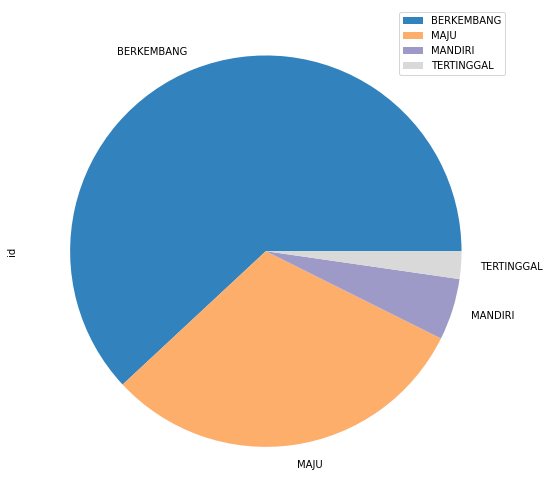

In [20]:
idmnew.groupby("status").count().plot.pie(y = "id", figsize=(9, 9),cmap = "tab20c" )

In [ ]:
idmnew["stated"] = ""
idmnew.stated[idmnew.status == "MAJU"] = "MAJU MANDIRI"
idmnew.stated[idmnew.status == "MANDIRI"] = "MAJU MANDIRI"
idmnew.stated[idmnew.status == "BERKEMBANG"] = "TERTINGGAL BERKEMBANG"
idmnew.stated[idmnew.status == "TERTINGGAL"] = "TERTINGGAL BERKEMBANG"

Berikut eksplorasi data hasil balancing

<AxesSubplot:ylabel='id'>

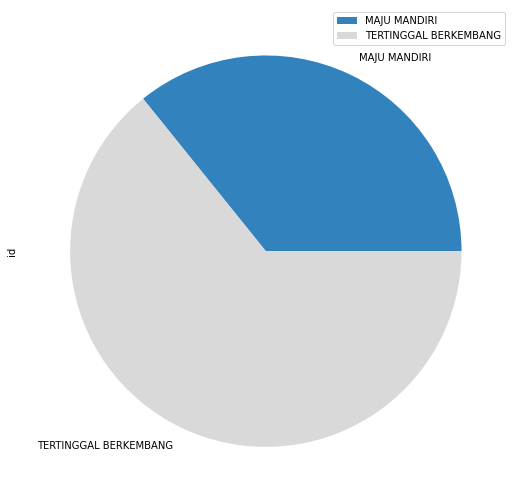

In [22]:
idmnew.groupby("stated").count().plot.pie(y = "id", figsize=(9, 9),cmap = "tab20c" )

In [ ]:
jabar["stated"] = None
jabar.stated[jabar.status == "MAJU"] = "MAJU MANDIRI"
jabar.stated[jabar.status == "MANDIRI"] = "MAJU MANDIRI"
jabar.stated[jabar.status == "BERKEMBANG"] = "TERTINGGAL BERKEMBANG"
jabar.stated[jabar.status == "TERTINGGAL"] = "TERTINGGAL BERKEMBANG"

<AxesSubplot:>

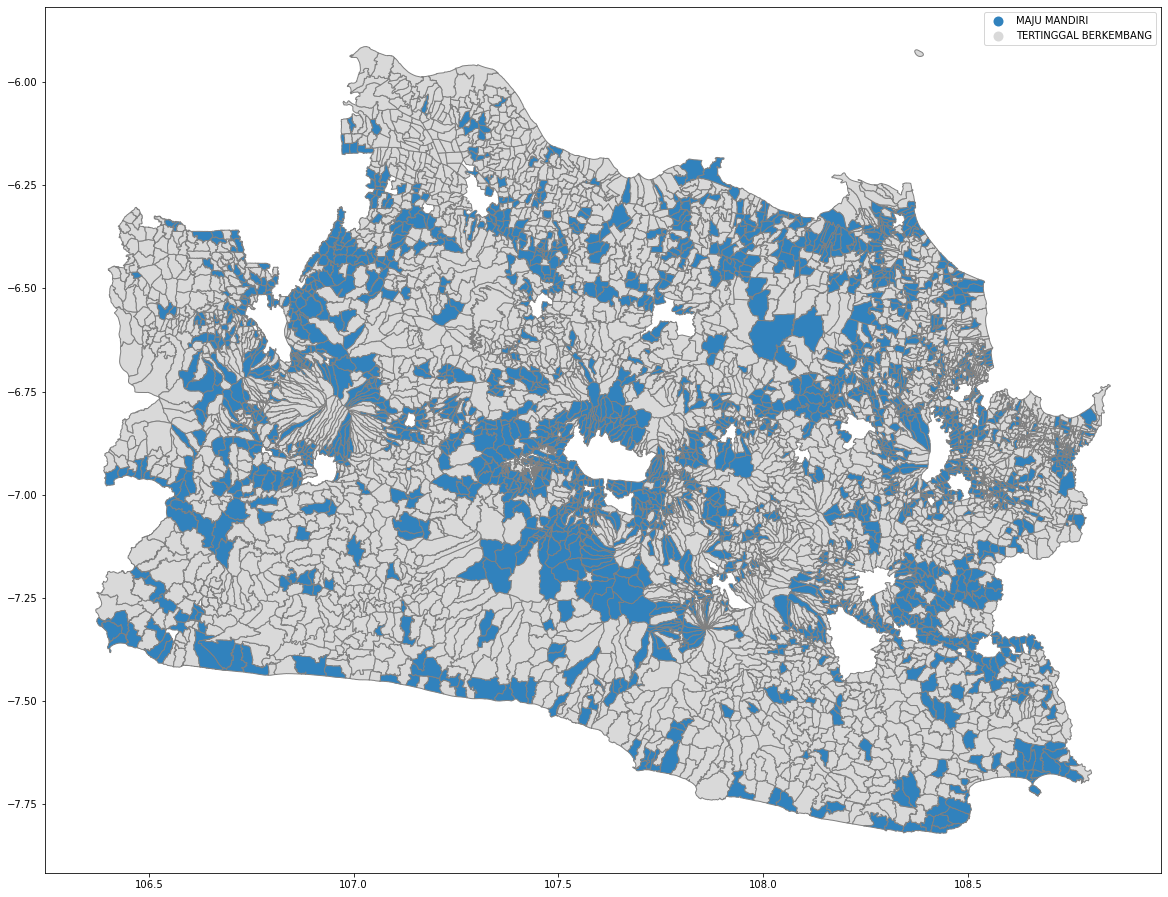

In [24]:
jabar.plot(column='stated', figsize=(20, 20), legend=True, edgecolor='grey',cmap = "tab20c" )